In [ ]:
!pip install openai
!pip3 install tika
!pip install rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=e889123b00369c54a515a23634ca553dfbe7b48250ef214f852b6e8e7827e02c
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 금융 관련 LLM Agent

##### 1. 산업 관련 문서 검색 시스템 구축

In [ ]:
import os

root_path = '/content/drive/MyDrive/데이터/part3_ch02_01'
file_list = os.listdir(root_path)
print(file_list)

['20240516_AI Tracker.pdf', '20240514_AI Tracker.pdf', '20240422_AI Tracker.pdf', '20240319_AI Tracker.pdf', '20240116_CES 2024.pdf', '20231121_[생성 AI 심화편 ②].pdf', '20231121_[생성 AI 심화편 ②] (1).pdf']


In [ ]:
file_path_list = [os.path.join(root_path, name) for name in file_list]
print(file_path_list)

['/content/drive/MyDrive/데이터/part3_ch02_01/20240516_AI Tracker.pdf', '/content/drive/MyDrive/데이터/part3_ch02_01/20240514_AI Tracker.pdf', '/content/drive/MyDrive/데이터/part3_ch02_01/20240422_AI Tracker.pdf', '/content/drive/MyDrive/데이터/part3_ch02_01/20240319_AI Tracker.pdf', '/content/drive/MyDrive/데이터/part3_ch02_01/20240116_CES 2024.pdf', '/content/drive/MyDrive/데이터/part3_ch02_01/20231121_[생성 AI 심화편 ②].pdf', '/content/drive/MyDrive/데이터/part3_ch02_01/20231121_[생성 AI 심화편 ②] (1).pdf']


In [ ]:
from tika import parser

corpus = []

for pdf_path in file_path_list:
  parsed = parser.from_file(pdf_path)
  txt = parsed['content']

  passage_len = 1024
  parsed_txt = [txt[i:i+passage_len] for i in range(0, len(txt), passage_len)]
  corpus += parsed_txt


In [ ]:
len(corpus)

426

In [ ]:
corpus[4]

'er \n엔비디아, 휴머노이드 로봇 개발 플랫폼 발표   \n\n\uf0a7 엔비디아, GTC에서 로봇용 파운데이션 모델과 테스트/훈련 인프라 발표 \n\n\uf0a7 생성 AI 도입으로 로봇의 인지/판단/제어 성능 빠르게 발전 중 \n\n\uf0a7 엔비디아의 참전으로 AI 로보틱스 산업 성장 가속화 전망 \n\n\n\nAI Tracker \n\n2   Mirae Asset Securities Research \n\n2024.3.19\n\n2. AI 로보틱스 산업 성장 가속화 전망  \n\n엔비디아의 이번 발표는 최근 구글, 테슬라, 스타트업 등이 발표하고 있는 연구 내용과 흐\n\n름이 크게 다르지 않다. 테슬라는 이미 지난 22년 AI 데이에서 자율주행에 사용되는 AI 기\n\n술을 로봇에 접목시켰고 이후 옵티머스의 성능이 빠르게 개선되고 있음을 시연을 통해 공\n\n개한 바 있다. 마이크로소프트 등으로부터 26억달러 가치를 인정받은 휴머노이드 로봇 스\n\n타트업 Figure는 사람이 “뭔가 먹을 게 있을까?”라고 묻자 책상 위에 있는 여러 물건들 중 \n\n사과를 건냈고 왜 그랬냐고 묻자 “사과가 유일하게 먹을 수 있는 것”이었다고 대답을 한다. \n\n다만 엔비디아가 본격적으로 시장에 뛰어들어 플랫폼을 제공한다면 로봇 산업 전체의 파이\n\n클 키울 수 있을 것으로 예상된다. 현재 탑티어 수준의 AI 기술을 가지고 있는 업체는 빅테\n\n크와 일부 스타트업에 불과한데 엔비디아가 AI 모델부터 학습 및 테스트 플랫폼까지 산업 \n\n전반에 제공한다면 로봇의 성능이 전반적으로 빠르게 개선될 수 있다. 또한 성능이 개선되\n\n면서 생산 물량이 함께 증가하게 되면 규모의 경제를 통해 현재 높은 원가를 차지하고 있는 \n\n액츄에이터 등 주요 부품의 원가가 하락할 수 있을 것으로 예상된다. 생성 AI 기술의 발전\n\n과 엔비디아 등 빅테크의 본격적인 진입으로 AI 로보틱스 산업 성장이 가속화될 전망이다.  \n\n해당 시장에서 궁극적으로 누가 승자가 될

In [ ]:
from rank_bm25 import BM25Okapi

def tokenizer(sent):
  return sent.split(" ")

tokenized_corpus = [tokenizer(doc) for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [ ]:
idx = 15

In [ ]:
print(tokenized_corpus[idx])
print(doc_scores[idx])

['현', '목표\n\n①', 'Microsoft', 'Azure', 'AI', '툴로모빌리티', '내', '대화형개인', '에이전트(Conversational', 'Personal', 'Agent)를', '개발', '➞', '생성', 'AI와', '클라우드', '규모컴퓨팅', '도입으로차량', '내', '창의적경험', '증폭화\n\n②', '전통적인', 'CNN이', '아닌', 'Vision', 'Transformer를', '사용함으로써더', '정확한객체', '인식', '가능.', 'Qualcomm의', 'Snapdragon', 'Ride', 'SoC는', 'AI', '기반머신', '러닝', '시스템에서핵심', '역할.\n\n③', 'Epic', 'Games와', '협업을', '통해', 'ADAS', '시뮬레이터와', 'AR', '로드맵', '내', '몰입형경험', '선사\n\n\n\nMirae', 'Asset', 'Securities', 'Research13', '|', 'CES', '2024\n\nAI', 'PC', '시대를', '준비하며\n\nII.', 'CES', 'Keynote:', 'Intel', '\n\n인텔', 'CEO', '패트릭', '겔싱어', '연설\n\n자료:', '미래에셋증권', '리서치센터,', 'CES', '2024\n\nIntel의', 'AI', '강화', 'SDV용', 'SoC\n\n자료:', 'Intel,', '미래에셋증권', '리서치센터,', 'CES', '2024\n\n•', '기술은', '중립적이고어떻게사용하는지에따라', '그', '의미가드러남.', 'AI도', '마찬가지\n\n•', 'High-end', 'Training', 'Workload를', '위해서는', 'GPU가', '필요.', '하지만,', '많은', '추론', '작업에서', 'AI', '증강', 'CPU', '또한', '제대로', '추론하고훈련하는데', '쓰임\n\n•', 'AI', 'PC', '이용속도는', '처음에더디다가', '어느수준에', '올라가면확

In [ ]:
print(tokenized_corpus[4])
print(doc_scores[4])

['er', '\n엔비디아,', '휴머노이드', '로봇', '개발', '플랫폼', '발표', '', '', '\n\n\uf0a7', '엔비디아,', 'GTC에서', '로봇용', '파운데이션', '모델과', '테스트/훈련', '인프라', '발표', '\n\n\uf0a7', '생성', 'AI', '도입으로', '로봇의', '인지/판단/제어', '성능', '빠르게', '발전', '중', '\n\n\uf0a7', '엔비디아의', '참전으로', 'AI', '로보틱스', '산업', '성장', '가속화', '전망', '\n\n\n\nAI', 'Tracker', '\n\n2', '', '', 'Mirae', 'Asset', 'Securities', 'Research', '\n\n2024.3.19\n\n2.', 'AI', '로보틱스', '산업', '성장', '가속화', '전망', '', '\n\n엔비디아의', '이번', '발표는', '최근', '구글,', '테슬라,', '스타트업', '등이', '발표하고', '있는', '연구', '내용과', '흐\n\n름이', '크게', '다르지', '않다.', '테슬라는', '이미', '지난', '22년', 'AI', '데이에서', '자율주행에', '사용되는', 'AI', '기\n\n술을', '로봇에', '접목시켰고', '이후', '옵티머스의', '성능이', '빠르게', '개선되고', '있음을', '시연을', '통해', '공\n\n개한', '바', '있다.', '마이크로소프트', '등으로부터', '26억달러', '가치를', '인정받은', '휴머노이드', '로봇', '스\n\n타트업', 'Figure는', '사람이', '“뭔가', '먹을', '게', '있을까?”라고', '묻자', '책상', '위에', '있는', '여러', '물건들', '중', '\n\n사과를', '건냈고', '왜', '그랬냐고', '묻자', '“사과가', '유일하게', '먹을', '수', '있는', '것”이었다고', '대답을', '한다.', '\n\n다만', '엔비디아가', 

In [ ]:
query = "AI 로봇 관련 이슈를 알려줘"
tokenized_query = tokenizer(query)

doc_scores = bm25.get_scores(tokenized_query)

passages = bm25.get_top_n(tokenized_query, corpus, n=5)

for p in passages:
  print(p)

##### 2. 산업 관련 문서 검색 시스템 심화 (쿼리 수정)

In [ ]:
from openai import OpenAI

OPENAI_API_KEY= # OpenAI API Key
model_name="gpt-3.5-turbo"

client = OpenAI(
    api_key=OPENAI_API_KEY,
)

In [ ]:
from string import Template

query_rewrite_prompt = Template("""
너는 주어진 사용자의 질문과 관련 있는 문서를 생성해주는 인공지능 챗봇이야.

사용자의 질문에 대해 정답이 될 수 있거나 관련 있을 만한 정보를 생성해 줘.

질문: $input
""")

In [ ]:
def query_rewrite(query):
  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": query_rewrite_prompt.substitute(input=query),
          }
      ],
      model=model_name,
  )
  return chat_completion.choices[0].message.content

In [ ]:
rewrite_query = query_rewrite("AI 로봇 관련 이슈를 알려줘")
print(rewrite_query)

AI로봇은 최근 몇 년간 기술의 발전으로 많은 이슈를 일으키고 있습니다. 그 중에서 가장 큰 이슈는 인공지능 기술의 발전으로 인한 일자리 우려입니다. 아직까지는 일부 산업 분야에서는 인력을 대체하여 생산성을 향상시키는 데 도움을 주지만, 동시에 일부 직종은 자동화로 인해 일자리가 감소하는 현상도 있습니다. 이러한 문제에 대한 대안으로는 교육을 통한 기술 발전에 대한 대비와 산업 구조의 변화에 대한 적응이 필요합니다. 또한 AI로봇이 사람의 개인 정보를 수집하고 사용하는 문제, 윤리적인 문제, 안전 문제 등도 여전히 논란이 되고 있습니다. 이러한 이슈들이 해결되기 위해서는 국제적인 토론과 협력이 필요하며, 기술의 발전과 함께 이를 적극적으로 대응할 필요가 있습니다.


In [ ]:
tokenized_query = tokenizer(rewrite_query)

doc_scores = bm25.get_scores(tokenized_query)

passages = bm25.get_top_n(tokenized_query, corpus, n=5)

for p in passages:
  print(p)

기 위해 AI 모델을 활용할 수 있으며, PentestGPT와 같은 윤리적 목적으로 

개발된 AI 도구도 있지만, 이러한 원리조차 악용될 가능성 

공격 페이로드 생성  
공격자가 ChatGPT와 같은 AI 모델을 사용하여 공격 페이로드를 생성할 수 있는 능력을 갖추고 있으며, 이를 통해 다양한 위협을 빠르게 

만듬 

랜섬웨어 및 악성코드  ChatGPT와 같은 강력한 AI 모델을 사용하여 자동화될 수 있으며, 악의적인 소프트웨어를 더 빠르게 생성 

 사례1) - ChatGPT를 사용하여 REvil 공격과 관련된 코드를 생성하려고 시도하였으며, 이를 통해 네트워크 스캔 및 공격 특징과 같은 특정 

기능에 대한 코드를 생성하는 능력을 보여줌 

 사례2) - 애드웨어, 스파이웨어 및 트로이 목마에 대한 코드도 ChatGPT를 통해 생성할 수 있습니다. 애드웨어는 광고를 통해 전송되고  

스파이웨어는 사용자에게 제공되며 트로이 목마는 합법적인 소프트웨어로 위장 
 사례3) - Meltdown 및 Spectre와 같은 CPU 아키텍처를 공격하는 특정 바이러스에 대한 코드 예제도 ChatGPT를 통해 생성 가능 

자료: IEEE Access, 미래에셋증권 리서치센터 

 

표 18. 사이버보안 방어 증가 사례  

기능 생성AI 활용 내용 

사이버 방어 자동화  
ChatGPT는 사이버 보안 사고의 분석을 자동화하고 전략적인 권고 사항을 제공하며 보안 교육을 지원하는 데 큰 역할 가능. 보안 운영 센터 

(SOC) 분석가의 업무 부담을 줄이고 전반적인 보안 수준을 향상시킬 수 있음 

사이버 보안 보고  ChatGPT는 사이버 보안 데이터와 사건을 기반으로 자연어 보고서를 생성하여 이를 이해하기 쉽게 다양한 이해 관계자에게 전달 

위협 인텔리전스  
ChatGPT는 대량의 데이터를 처리하여 잠재적인 보안 위협을 식별하고 실행 가능한 인텔리전스 보고서를 생성함으로써 조직이 보안 수준을 

향상하는 데 도움 

안전한 코드 생성과 감지  코드 검토에서

##### 3. 투자 리포트 RAG 기반 금융 질문 답변

In [ ]:
from string import Template

rag_prompt = Template("""
너는 사용자의 투자 관련 질문에 대해서 주어진 문서를 바탕으로 답변해 주는 인공지능 상담 봇이야.

사용자의 질문에 대해 문서에 기반하여 최대한 친절하고 자세하게 답변해줘.

관련 문서
$doc

질문: $query
답변:
""")

In [ ]:
passages

['있다는 것이 큰 강점\n\n\n\n2024\n\n\n\nMirae Asset Securities Research19 | CES 2024\n\nAI로 생태계 확대 전망\n\nIII. CES 5가지 IT 트렌드\n\n미국 라스베가스 1월 8~12일에 진행된 CES 2024의 슬로건 All On\n\n자료: CES 2024, 미래에셋증권 리서치센터\n\n• CES 2024에서 일상생활에서 어떠한 기기와 기술들이 고객의 편의성에 따라\n수요가 창출될 것인지 집중하는 것이 필요하다고 판단\n\n• 생성형 AI 기술이 보급되며 데이터 처리 역량 확대, 회사 업무 향상에 도입이\n빠르게 진행되고 On device AI가 탑재된 노트북, 스마트폰의 출시가\n가속화되면서 업무 효율성 극대화와 제품 편의성이 높아지는 제품을 주목해야함\n\n• 백색 가전과 더불어 AI 도입이 스마트홈 가전의 영역을 확대시킬 것으로 기대\n\n• 또한, AI 기반 로봇들의 등장으로 물류 자동화 로봇과 커피와 칵테일 제조하는\n서비스용 로봇이 향후 도입이 빠를 것으로 판단. 최근 Nvidia, Qualcomm 등 칩\n메이커 업체들의 고성능 로봇 AI 칩 개발과 5G 인프라 개선으로 산업 성장 기대\n\n• Mobility 영역에서는 전기차의 스펙 상향과 더불어 수소 생태계도 강조. ADAS를\n위한 AI 기반 고도화된 센서도 확대. 배터리는 반고체 배터리도 소개되었음\n\n• CES 2024에서 IT 트렌드는 5가지 세그먼트를 주목해야 된다고 판단\n\n1 스마트홈:  다양한 측정 데이터를 AI로 분석하여 고객의 맞춤형 솔루션\n\n제공. AI 로봇 도우미 출시와 AI 접목된 새로운 기기들의 출시 기대\n\n2 로봇 : AI 기반 스마트 팩토리 化 자동화 공정을 위한 산업용 로봇과 개인\n\n맞춤식 서비스용 로봇의 확대 기대\n\n3 AI: 데이터 처리 역량 확대로 업무 처리 회사 업무 기반 생성형 AI 도입이\n\n빠르게 진행. 온디바이스 AI로 제품 차별화 강화\n\n4 Mobility: 

In [ ]:
import re
def passage_formatting(passages):
  processed_passages = ""
  for idx, p in enumerate(passages):
    processed_p = re.sub(r'\n+', '\n', p)
    processed_passages += f"\n\n[문서{idx}] : " + processed_p
  return processed_passages

In [ ]:
print(passage_formatting(passages))



[문서0] : 기 위해 AI 모델을 활용할 수 있으며, PentestGPT와 같은 윤리적 목적으로 
개발된 AI 도구도 있지만, 이러한 원리조차 악용될 가능성 
공격 페이로드 생성  
공격자가 ChatGPT와 같은 AI 모델을 사용하여 공격 페이로드를 생성할 수 있는 능력을 갖추고 있으며, 이를 통해 다양한 위협을 빠르게 
만듬 
랜섬웨어 및 악성코드  ChatGPT와 같은 강력한 AI 모델을 사용하여 자동화될 수 있으며, 악의적인 소프트웨어를 더 빠르게 생성 
 사례1) - ChatGPT를 사용하여 REvil 공격과 관련된 코드를 생성하려고 시도하였으며, 이를 통해 네트워크 스캔 및 공격 특징과 같은 특정 
기능에 대한 코드를 생성하는 능력을 보여줌 
 사례2) - 애드웨어, 스파이웨어 및 트로이 목마에 대한 코드도 ChatGPT를 통해 생성할 수 있습니다. 애드웨어는 광고를 통해 전송되고  
스파이웨어는 사용자에게 제공되며 트로이 목마는 합법적인 소프트웨어로 위장 
 사례3) - Meltdown 및 Spectre와 같은 CPU 아키텍처를 공격하는 특정 바이러스에 대한 코드 예제도 ChatGPT를 통해 생성 가능 
자료: IEEE Access, 미래에셋증권 리서치센터 
 
표 18. 사이버보안 방어 증가 사례  
기능 생성AI 활용 내용 
사이버 방어 자동화  
ChatGPT는 사이버 보안 사고의 분석을 자동화하고 전략적인 권고 사항을 제공하며 보안 교육을 지원하는 데 큰 역할 가능. 보안 운영 센터 
(SOC) 분석가의 업무 부담을 줄이고 전반적인 보안 수준을 향상시킬 수 있음 
사이버 보안 보고  ChatGPT는 사이버 보안 데이터와 사건을 기반으로 자연어 보고서를 생성하여 이를 이해하기 쉽게 다양한 이해 관계자에게 전달 
위협 인텔리전스  
ChatGPT는 대량의 데이터를 처리하여 잠재적인 보안 위협을 식별하고 실행 가능한 인텔리전스 보고서를 생성함으로써 조직이 보안 수준을 
향상하는 데 도움 
안전한 코드 생성과 감지  코드 검토에서 보안 버그를 

In [ ]:
def answer_finance_query_with_docs(query):
  # 1 query rewrite
  rewrite_query = query_rewrite(query)

  # 2 retrieve
  tokenized_query = tokenizer(rewrite_query)
  passages = bm25.get_top_n(tokenized_query, corpus, n=5)

  # 3 passage formatting
  processed_passages = passage_formatting(passages)

  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": rag_prompt.substitute(doc=processed_passages, query=query),
          }
      ],
      model=model_name,
  )
  return chat_completion.choices[0].message.content

In [ ]:
query = "AI 로봇 관련 이슈를 알려줘"
answer_finance_query_with_docs(query)

'AI 로봇 관련 이슈는 다양한 측면에서 다뤄지고 있습니다. 최근에는 융권 내 생성형 AI 기술을 이용한 뱅킹 서비스에서의 적용 사례가 주목받고 있습니다. 이를 통해 고객들의 은행 업무를 처리하는 AI 로봇인 Erica가 금융 정보 제공부터 송금 및 결제까지 다양한 기능을 이용할 수 있게 되었습니다.\n\n또한, 사이버 보안 분야에서도 AI 모델을 활용한 방어 및 위협 인텔리전스에 대한 연구와 적용이 이루어지고 있습니다. AI 모델을 악용하여 공격 페이로드를 생성하는 경우도 있지만, 이를 통해 사이버 보안공격에 대한 대비와 방어력을 높일 수 있는 가능성도 열리고 있습니다.\n\n또한 정신건강 분야나 의료시스템 분야에서도 AI 모델을 활용한 개선 및 운영효율화가 이루어지고 있습니다. 생성 AI 기술을 통해 의료서비스의 생산성을 향상시킬 수 있으며, 데이터를 적절히 활용하기 위해 신뢰구축, 데이터 상호운용성 향상, 파트너십 강화가 필요하다는 점이 지적되고 있습니다.\n\n이러한 AI 로봇 관련 이슈들은 다양한 분야에서 활발히 연구되고 있으며, 적용되는 과정에서는 개인정보 보호와 윤리적인 측면에 대한 고려가 필요하다는 점을 염두에 두어야 합니다.'

In [ ]:
query = "최근 AI 산업 트렌드에 대한 키워드를 뽑아줘"
answer_finance_query_with_docs(query)

'AI 로보틱스, 자동화, 인지/판단/제어, 노이드 로봇, 테스트/훈련 인프라, 생성 AI, 성장, 가속화, 휴머노이드 로봇, AI 모델, 학습, 테스트 플랫폼, 사이버보안, 생성AI, 보안 방법, 해킹 공격, 스위치 기법, 캐릭터 플레이, 피싱, 랜섬웨어, 공격 증가, 솔루엠, 디지털 헬스 트렌드, 건강관리, 치료, 데바이스, 본텍,  인텔리전스, 보고서, 안전한 코드, 감지, 산업성장, 머신러닝, SOC, 인텔리전스 보고서, 바이러스, CPU 아키텍처, 특정 바이러스.'

##### 4. GPT 4 vision을 활용한 차트 분석

In [ ]:
!pip install matplotlib
!pip install Pillow

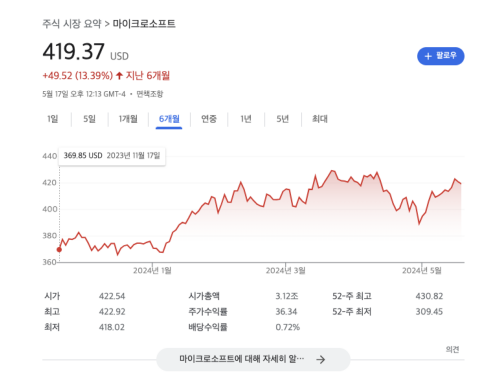

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "/content/drive/MyDrive/데이터/part3_ch02_01_images/1.png"

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
import base64
import requests

def answer_about_chart(query):
  def encode_image(image_path):
    with open(image_path, "rb") as image_file:
      return base64.b64encode(image_file.read()).decode('utf-8')

  image_path = "/content/drive/MyDrive/데이터/part3_ch02_01_images/1.png"

  base64_image = encode_image(image_path)

  headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {OPENAI_API_KEY}"
  }

  payload = {
    "model": "gpt-4o",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": query
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
  }

  response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

  return response.json()['choices'][0]['message']['content']

In [ ]:
answer_about_chart("이미지에 있는 주식 차트에 대해 간단한 설명을 제공해줘")

'이미지에서 제공된 주식 차트는 마이크로소프트(Microsoft)의 지난 6개월 동안의 주가 변동을 보여줍니다. \n\n- **주가**:\n  - 현재 가격: 419.37 USD\n  - 지난 6개월 동안의 상승폭: +49.52 USD (13.39% 상승)\n\n- **차트**:\n  - 차트는 2023년 11월 17일부터 2024년 5월까지의 주가 변동을 나타냅니다.\n  - 초기 가격은 약 369.85 USD였으며, 이후 지속적으로 상승하여 2024년 3월경 최고점에 도달한 후 약간의 하락과 상승을 반복하고 있습니다.\n\n- **주요 지표**:\n  - 시가: 422.54 USD\n  - 최고가: 422.92 USD\n  - 최저가: 418.02 USD\n  - 시가총액: 3.12조 USD\n  - 주가수익률: 36.34\n  - 배당수익률: 0.72%\n  - 52주 최고: 430.82 USD\n  - 52주 최저: 309.45 USD\n\n이 데이터는 주식 투자자들에게 마이크로소프트 회사의 최근 주식 성과와 변동성을 평가하는 데 도움을 줄 수'

##### 5. 투자 리포트 기반 차트 분석

In [ ]:
answer_about_chart("마이크로소프트 주식이 상승했던 이유가 뭐야?")

'마이크로소프트(Microsoft) 주식이 상승한 이유는 여러 가지가 있을 수 있습니다. 일반적으로 몇 가지 주요 요인은 다음과 같습니다:\n\n1. **재무 성과**: 뛰어난 분기 실적 발표 및 예상보다 높은 수익과 이익이 주가 상승을 이끌 수 있습니다. 높은 매출 성장과 수익률 증가는 투자자들의 신뢰를 높입니다.\n\n2. **시장 동향 및 기술 발전**: 클라우드 컴퓨팅, 인공지능(AI), SaaS(Software as a Service) 등 본사의 핵심 기술 분야에서의 혁신과 시장 점유율 확대는 주가 상승에 크게 기여할 수 있습니다. \n\n3. **인수 및 합병**: 마이크로소프트가 전략적으로 중요한 기업을 인수한 경우, 이는 미래의 성장 가능성을 높이며 주식 가치를 증대시킬 수 있습니다.\n\n4. **경영진의 결정**: 새로운 경영 전략, 사업 다각화, 혹은 주주 환원 정책 등이 주가 상승으로 이어질 수 있습니다.\n\n5. **경제적 조건**: 글로벌 경제 상황과 관련된 요인들이 마이크로소프트와 같은 대형 IT 기업에 긍정적으로 작용할 수 있습니다.\n\n정확한 이유는 특정 시점에서의 뉴스, 재무 보고서 및 시장 분석 등을 통해 확인하는 것이 필요합니다. 2023'

In [ ]:
from string import Template

query_generate_prompt = Template("""
너는 사용자의 투자 관련 질문에 대해서 주어진 차트를 보고 문서에서 가져와야 하는 정보를 정리하는 인공지능 봇이야.

사용자의 질문에 대해 차트를 보고 문서에서 가져와야 할 질문을 만들어줘.

질문: $query
""")

In [ ]:
query = "마이크로소프트 주식이 상승했던 이유가 뭐야?"
gen_query=answer_about_chart(query_generate_prompt.substitute(query = query))

In [ ]:
print(gen_query)

차트를 기반으로 사용자 질문에 답변하기 위해 문서에서 필요한 질문들을 다음과 같이 정리할 수 있습니다:

1. **기업 실적 관련 질문:**
   - 지난 6개월 동안 마이크로소프트의 주요 실적 발표(예: 분기 실적 보고서)와 관련한 정보가 있나요?
   - 마이크로소프트의 최근 수익성 변화에 대한 내용이 있나요?

2. **사업 확장 및 전략 관련 질문:**
   - 마이크로소프트가 발표한 새로운 제품이나 서비스에 대한 정보가 있나요?
   - 마이크로소프트의 인수 또는 합병 소식에 대한 정보가 있나요?

3. **시장 및 경제 환경 관련 질문:**
   - 최근 기술 산업 전반에 걸쳐 긍정적인 경제 지표가 있었나요?
   - 마이크로소프트가 주요 계약을 체결하거나 파트너십을 발표한 내용이 있나요?

4. **자사주 매입 및 배당 관련 질문:**
   - 지난 몇 달 동안 마이크로소프트가 자사주 매입을 발표했나요?
   - 마이크로소프트가 배당금을 인상했는지 여부에 대한 정보가 있나요?

5. **주요 이벤트 및 발표 관련 질문:**
   - 최근 마이크로소프트의 주가 상승에 영향을 미칠 수 있는 주요 이벤트나 발표가


In [ ]:
answer_finance_query_with_docs(gen_query)

'1. 최근 6개월 동안 마이크로소프트의 주요 뉴스 및 이벤트로는, 엔비디아와의 파트너십을 통해 로봇용 파운데이션 모델과 테스트/훈련 인프라를 발표한 사실이 있습니다. 또한 AI 로보틱스 산업에서의 성장에 대한 전망이 밝히고 엔비디아의 참여로 AI 로보틱스 산업 성장을 가속화할 것으로 전망되었습니다.\n\n2. 최근 6개월 동안 마이크로소프트의 실적 발표와 관련된 자세한 내용은 문서에서 언급되지 않았습니다.\n\n3. 최근에 마이크로소프트가 발표한 새로운 제품이나 서비스에 대한 정보는 문서에서 다루지 않았습니다.\n\n4. 마이크로소프트의 주가에 영향을 미칠 수 있는 업계 변화나 트렌드로는 AI 로보틱스 산업에서의 성장과 엔비디아의 참여로 인해 로봇의 인지/판단/제어 성능이 발전 중이라는 점이 있습니다.\n\n5. 마이크로소프트에 대한 애널리스트의 평가나 추천은 문서에서 언급되지 않았습니다.\n\n6. 최근 마이크로소프트가 발표한 주요 인수합병(M&A) 활동에 대한 정보는 문서에서 다루지 않았습니다.'

**Reference**
https://platform.openai.com/docs/guides/vision